In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, make_scorer, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import lightgbm as lgb

In [2]:
best_set = ['m_p_r_eta',
 'm_ac_propensioneRischio_italia_vs_europa',
 'm_ac_diminuzione_ruolo_partiti',
 'm_ac_affidamento_pubblica_tecnici',
 'm_ac_valori_resistenza_altra_epoca',
 'm_ac_sindacato_ancoraUtile',
 'm_ac_troppo_focus_uguaglianza_vs_merito',
 'm_ac_meglio_uguaglianza_vs_merito_singolo',
 'm_ac_crimin_diventera_incontenibile',
 'm_ac_validita_insegnamChiesa',
 'm_ac_societa_troppoPermissiva_gay',
 'm_ac_legalizz_drogheLeggere',
 'm_ac_chiesa_nonDovrebbe_condizionare_stato.1',
 'm_ac_testamento_biologico',
 'm_ac_immigrati_rubano_lavoro',
 'm_ac_immigrati_risorsa',
 'm_ac_immigrati_portano_criminalita',
 'm_ac_immigrati_diritto_voto',
 'm_ac_immigrati_nonRispettano_regoleDelloStareInsieme',
 'm_ac_modernizzazioneItalia_grazie_UE',
 'm_ac_religioneIslamica_pericoloPerTutti',
 'm_ac_italia_troppeConcessioni_immigratiMusulmani',
 'm_ac_troppo_allarmismo_ecologia_inquinamento',
 'm_ac_difesa_scuolaPubblica_insensata',
 'm_ac_problemi_eticiMorali_sperimentazioneGenetica',
 'm_ac_nord_unicoMotore_economiaItaliana',
 'm_ac_lavoroNord_consente_diEssere_alPasso_con_UE',
 'm_ac_italia_ipartecipazioneIn_missioniMilitariEstere',
 'm_ac_lavorare_importante_postoStabile_no',
 'm_ac_badare_propriInteressi_perSopravvivere',
 'm_ac_modelloImprenditorialePrivato_unico_produceRicchezzaPerTutti',
 'm_ac_meno_relazioniSociali_amicali_vs_qualcheAnnoFa',
 'm_TREND_25_IMMIGRAZIONE (atteggiamento POSITIVO nei confronti degli immigrati)',
 'm_TREND_26_NAZIONE EUROPA',
 'm_TREND_53_IL PERICOLO POPULISTA',
 'm_p_int_voto'
 ]

In [3]:
new_cl = {'m_p_r_eta': 'Age',
 'm_ac_propensioneRischio_italia_vs_europa':'ItaVSEu',
 'm_ac_diminuzione_ruolo_partiti':'RoleParties',
 'm_ac_affidamento_pubblica_tecnici':'TechnicalGovernment',
 'm_ac_valori_resistenza_altra_epoca':'OldValues',
 'm_ac_sindacato_ancoraUtile':'UtilitySyndicate',
 'm_ac_troppo_focus_uguaglianza_vs_merito':'TooFocusEqualityVMmerit',
 'm_ac_meglio_uguaglianza_vs_merito_singolo':'BetterEqualityVSingle_Merit',
 'm_ac_crimin_diventera_incontenibile':'TooCrime',
 'm_ac_validita_insegnamChiesa':'MoralValidityChurc',
 'm_ac_societa_troppoPermissiva_gay':'TooPermissiveGay',
 'm_ac_legalizz_drogheLeggere':'LegalizeSoftDrugs',
 'm_ac_chiesa_nonDovrebbe_condizionare_stato.1':'ChurchNoInfluenceState',
 'm_ac_testamento_biologico':'LivingWill',
 'm_ac_immigrati_rubano_lavoro':'ImmigrantsStealJobs',
 'm_ac_immigrati_risorsa':'ImmigrantsAsResource',
 'm_ac_immigrati_portano_criminalita':'ImmigrantsBringCrime',
 'm_ac_immigrati_diritto_voto':'ImmigrantsRighToVote',
 'm_ac_immigrati_nonRispettano_regoleDelloStareInsieme':'ImmigrantsNotRespectRules',
 'm_ac_modernizzazioneItalia_grazie_UE':'ModernizationThkEU',
 'm_ac_religioneIslamica_pericoloPerTutti':'DangerIslamicReligion',
 'm_ac_italia_troppeConcessioni_immigratiMusulmani': 'TooSoftIslam',
 'm_ac_troppo_allarmismo_ecologia_inquinamento':'TooEcologyAlarmism',
 'm_ac_difesa_scuolaPubblica_insensata':'PublicSchoolDefense',
 'm_ac_problemi_eticiMorali_sperimentazioneGenetica':'ProblematicGeneticExp',
 'm_ac_nord_unicoMotore_economiaItaliana':'NorthUniqueEngine',
 'm_ac_lavoroNord_consente_diEssere_alPasso_con_UE':'LikeEuThkNorth',
 'm_ac_italia_ipartecipazioneIn_missioniMilitariEstere':'MilitaryAction',
 'm_ac_lavorare_importante_postoStabile_no':'WorkMoreStablePlace',
 'm_ac_badare_propriInteressi_perSopravvivere':'IndividualInterests',
 'm_ac_modelloImprenditorialePrivato_unico_produceRicchezzaPerTutti':'PrivateCompanies',
 'm_ac_meno_relazioniSociali_amicali_vs_qualcheAnnoFa':'MoreAntisocial',
 'm_TREND_25_IMMIGRAZIONE (atteggiamento POSITIVO nei confronti degli immigrati)':'PositiveImmigration',
 'm_TREND_26_NAZIONE EUROPA':'NationVSEu',
 'm_TREND_53_IL PERICOLO POPULISTA':'PopulistDanger',
 'm_p_int_voto':'VotingIntention'
 }

In [4]:
#lettura csv
filepath = r"C:\Users\lucap\OneDrive\Desktop\PhD\Racheal\Dati\Walden 97-19 integrated v2.csv"
df = pd.read_csv(filepath, sep = ";" )
#df = df[df['m_anno_indagine'] > 2016] #seleziono le righe che riguardano l'osservatorio dal 2019 in poi
df = df[df['m_anno_indagine']>=2017].drop_duplicates(subset='IDU', keep="last")
df = df[
   df.columns[ df.isna().sum() <= 0.3 * len(df) ] ]#seleziono solo le colonne hanno valori Nan inferiori al 30%
# Rimuovere gli spazi bianchi da tutte le colonne
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

df_sub = df[best_set].copy()

C:\Users\lucap\AppData\Local\Temp\ipykernel_11976\2050876652.py:3: DtypeWarning: Columns (0,4,8,9,10,11,12,13,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,44,45,46,47,49,50,51,52,53,54,55,61,62,63,64,65,66,68,69,70,71,78,80,82,84,85,86,87,91,93,94,96,97,98,99,101,102,103,105,106,108,109,110,111,113,114,115,117,118,119,120,121,123,124,125,126,128,129,130,132,133,134,136,137,138,139,140,142,143,144,145,146,147,148,150,151,153,154,155,157,158,159,162,164,165,166,167,169,170,171,172,173,174,175,176,177,178,179,180,181,182,184,185,186,187,188,189,190,191,192,194,195,196,197,198,199,200,201,202,203,204,205,207,209,211,212,213,214,215,217,218,219,221,222,223,224,225,226,227,228,229,230,231,232,233,235,236,239,240,242,243,245,246,248,249,250,251,252,253,254,255,256,257,258,261,263,264,265,266,267,272,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,292,293,294,295,296,297,298,299,300,301,302,303,305,306,307,309,310,311,312,313,314,316,317,318,320,321,

In [5]:
df_sub.shape

(4504, 36)

In [6]:
diz_aliases_int_voto = {"Partito Democratico-PD":'Sx/CSx',
                "Partito Democratico":'Sx/CSx',
                "Lega con Salvini":'Dx/CDx',
                "Lega Nord":'Dx/CDx',
                "Lega":'Dx/CDx',
                "Forza Italia":'Dx/CDx',
                "Fratelli d'Italia":"Dx/CDx",
                'MoVimento 5 Stelle':'M5S',
                'Movimento 5 stelle':'M5S',
                'voterei  scheda bianca / annullerei la scheda':'astensione/bianca/nulla',
                'voterei scheda bianca / scheda nulla':'astensione/bianca/nulla',
                "+Europa":'Sx/CSx',
                "piu' Europa con Emma Bonino": "Sx/CSx",
                'Sinistra italiana (SEL + altri)':'Sx/CSx',
                'Potere al Popolo':'Sx/CSx',
                'Rifondazione Comunista':'Sx/CSx',
                "Fratelli d'Italia-Alleanza Nazionale&nbsp;":"Dx/CDx",
                'La Sinistra':'Sx/CSx',
                'Verdi':'Sx/CSx',
                'non andrei a votare':'astensione/bianca/nulla',
                'sono indeciso' : 'indecisi',
                'Liberi e Uguali' : 'Sx/CSx',
                'Italia dei Valori' : 'Sx/CSx',
                'Scelta Civica&nbsp;' : 'Sx/CSx',
                'Italia Unica di Corrado Passera' : 'Sx/CSx',
                "Noi con l'Italia UDC&nbsp;" : 'Dx/CDx',
                "altro partito di area di governo (SVP, Centro Democratico....)" : 'Altro partito',
                "Nuovo Centro Destra con UDC e PPI" : 'Dx/CDx'
                }

df_sub['m_p_int_voto'] = df_sub['m_p_int_voto'].replace(diz_aliases_int_voto)
df_sub = df_sub[~df_sub['m_p_int_voto'].isin(['Altro partito', 'preferisco non rispondere', 'indecisi','astensione/bianca/nulla' ])]
df_sub.shape

(3319, 36)

In [7]:
diz_aliases_ac = {"del tutto d'accordo":2,
            "del tutto<BR>d'accordo":2,
		     "d'accordo":1,
		     "ne' d'accordo ne' in disaccordo (NON STIMOLARE)":0,
             "ne d'accordo ne' in disaccordo":0,
             "ne' d'accordo ne' in disaccordo":0,
             "preferisco non rispondere":0,
             "preferisco<BR>non<BR> rispondere":0,
            "non saprei":0,
             "in disaccordo":-1,
             'del tutto in disaccordo':-2,
             "del tutto disaccordo":-2,
             "del tutto<BR>in disaccordo":-2,
             
            
}

nomi_var = df_sub.columns.tolist()
for var in nomi_var:
    if '_ac_' in var:
        df_sub[var] = df_sub[var].replace(diz_aliases_ac)
        
        


diz_aliases_op = {"molto":2,
            "poco":-1,
		     "abbastanza":1,
		     "non saprei":0,
            "nessuno":-2,
            "per niente":-2}

nomi_var = df_sub.columns.tolist()
for var in nomi_var:
    if 'op' in var:
        df_sub[var] = df_sub[var].replace(diz_aliases_op)
        
        

diz_aliases_trend = {"in trend":1,
                 "slight in trend":1,
                 "slight off trend":0,
                 "off trend":0,
                 'non classificati':0}
 
nomi_var = df_sub.columns.tolist()
for var in nomi_var:
    if 'TREND' in var:
        df_sub[var] = df_sub[var].replace(diz_aliases_trend)
        
        




In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df_sub = df_sub.dropna()
df_sub.shape

(3117, 36)

In [10]:
df_sub = df_sub.rename(columns=new_cl)

In [11]:
X = df_sub.drop(columns = ['VotingIntention'])
y = df_sub.VotingIntention

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42, stratify=y) 

In [12]:
class_names = ['Dx/CDx', 'M5S', 'Sx/CSx']

In [13]:
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', n_jobs=4, importance_type='split',random_state=42)

#parametri_grid_lgb = {
#            'learning_rate' : [0.1],
#            'n_estimators' : [80],
#            'max_depth' : [15],
#            'colsample_bytree' : [0.5],
#            'reg_alpha' : [0.1],
#            'reg_lambda' : [5]
#            }

parametri_grid_lgb = {
            'learning_rate' : [0.1,0.01],
            'n_estimators' : [60, 80],
            'max_depth' : [15, 20],
            'colsample_bytree' : [0.3, 0.5, 0.8],
            'reg_alpha' : [0.1, 0.25],
            'reg_lambda' : [3, 5, 8]
            }

In [14]:
grid_search_lgb_recall_micro = GridSearchCV(lgb_classifier , parametri_grid_lgb, cv=5,
                               scoring='recall_micro',
                               return_train_score=True,n_jobs=4,verbose=2,error_score='raise')


grid_search_lgb_prec_micro = GridSearchCV(lgb_classifier , parametri_grid_lgb, cv=5,
                               scoring='precision_micro',
                               return_train_score=True,n_jobs=4,verbose=2,error_score='raise')


grid_search_lgb_acc = GridSearchCV(lgb_classifier , parametri_grid_lgb, cv=5,
                               scoring='accuracy',
                               return_train_score=True,n_jobs=4,verbose=2,error_score='raise')

In [15]:
# Esegui la Grid Search sul set di addestramento
y_pred_lgb = grid_search_lgb_recall_micro.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [16]:

# Stampa i parametri migliori trovati
print("Migliori parametri:", grid_search_lgb_recall_micro.best_params_)

# Valuta il modello migliore sul set di test
accuracy_lgb = grid_search_lgb_recall_micro.best_estimator_.score(X_test, y_test)
print("Accuratezza sul set di test:", accuracy_lgb)

Migliori parametri: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 80, 'reg_alpha': 0.1, 'reg_lambda': 5}
Accuratezza sul set di test: 0.6762820512820513


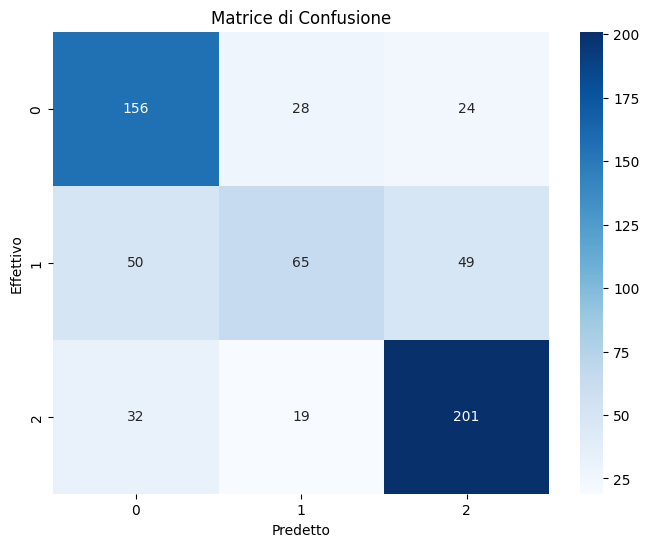

Classification Report:
              precision    recall  f1-score   support

      Dx/CDx       0.66      0.75      0.70       208
         M5S       0.58      0.40      0.47       164
      Sx/CSx       0.73      0.80      0.76       252

    accuracy                           0.68       624
   macro avg       0.66      0.65      0.64       624
weighted avg       0.67      0.68      0.67       624



In [17]:
# Estrai il miglior modello
miglior_modello_lgb = grid_search_lgb_recall_micro.best_estimator_

# Fai previsioni sul set di test
y_pred_lgb = miglior_modello_lgb.predict(X_test)

# Calcola la matrice di confusione
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Visualizza la matrice di confusione utilizzando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice di Confusione")
plt.xlabel("Predetto")
plt.ylabel("Effettivo")
plt.show()

# Visualizza il classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


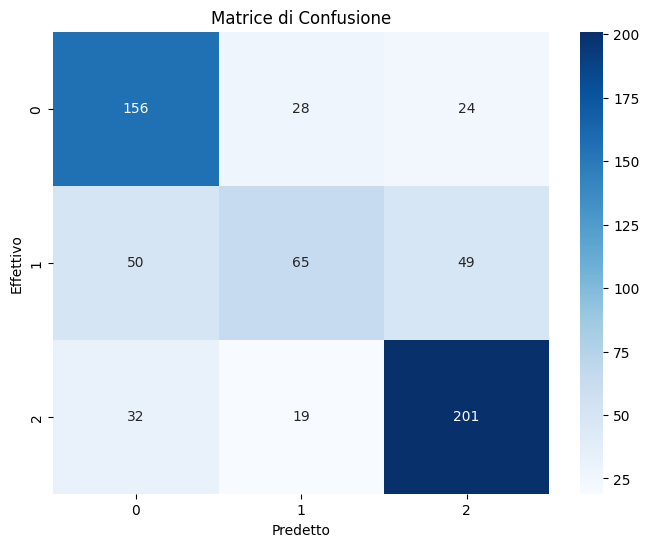

Classification Report:
              precision    recall  f1-score   support

      Dx/CDx       0.66      0.75      0.70       208
         M5S       0.58      0.40      0.47       164
      Sx/CSx       0.73      0.80      0.76       252

    accuracy                           0.68       624
   macro avg       0.66      0.65      0.64       624
weighted avg       0.67      0.68      0.67       624



In [18]:
# Esegui la Grid Search sul set di addestramento
y_pred_lgb = grid_search_lgb_acc.fit(X_train, y_train)

# Estrai il miglior modello
miglior_modello_lgb = grid_search_lgb_acc.best_estimator_

# Fai previsioni sul set di test
y_pred_lgb = miglior_modello_lgb.predict(X_test)

# Calcola la matrice di confusione
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Visualizza la matrice di confusione utilizzando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice di Confusione")
plt.xlabel("Predetto")
plt.ylabel("Effettivo")
plt.show()

# Visualizza il classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))

Fitting 5 folds for each of 144 candidates, totalling 720 fits


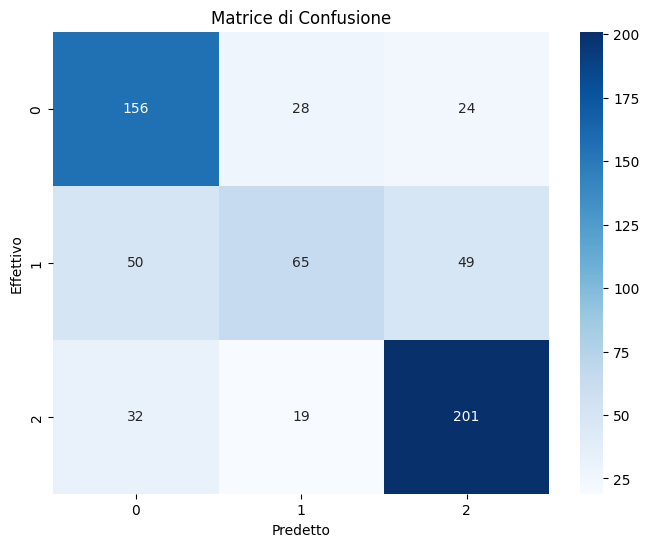

In [19]:
# Esegui la Grid Search sul set di addestramento
y_pred_lgb = grid_search_lgb_prec_micro.fit(X_train, y_train)

# Estrai il miglior modello
miglior_modello_lgb = grid_search_lgb_prec_micro.best_estimator_

# Fai previsioni sul set di test
y_pred_lgb = miglior_modello_lgb.predict(X_test)

# Calcola la matrice di confusione
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Visualizza la matrice di confusione utilizzando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice di Confusione")
plt.xlabel("Predetto")
plt.ylabel("Effettivo")
plt.show()

In [20]:
lgb_classifier = lgb.LGBMClassifier(boosting_type='gbdt', n_jobs=4, importance_type='split',random_state=42)

parametri_grid_lgb = {
            'learning_rate' : [0.1],
            'n_estimators' : [80],
            'max_depth' : [15],
            'colsample_bytree' : [0.5],
            'reg_alpha' : [0.1],
            'reg_lambda' : [5]
            }

In [21]:
grid_search_lgb = GridSearchCV(lgb_classifier , parametri_grid_lgb, cv=5,
                               scoring='accuracy',
                               return_train_score=True,n_jobs=4,verbose=2, error_score = 'raise')

In [22]:
# Esegui la Grid Search sul set di addestramento
y_pred_lgb = grid_search_lgb.fit(X_train, y_train)

# Stampa i parametri migliori trovati
print("Migliori parametri:", grid_search_lgb.best_params_)

# Valuta il modello migliore sul set di test
accuracy_lgb = grid_search_lgb.best_estimator_.score(X_test, y_test)
print("Accuratezza sul set di test:", accuracy_lgb)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Migliori parametri: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 80, 'reg_alpha': 0.1, 'reg_lambda': 5}
Accuratezza sul set di test: 0.6762820512820513


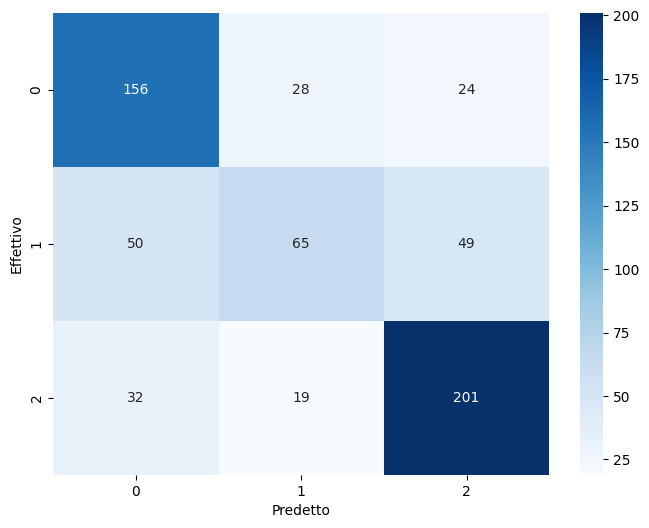

Classification Report:
              precision    recall  f1-score   support

      Dx/CDx       0.66      0.75      0.70       208
         M5S       0.58      0.40      0.47       164
      Sx/CSx       0.73      0.80      0.76       252

    accuracy                           0.68       624
   macro avg       0.66      0.65      0.64       624
weighted avg       0.67      0.68      0.67       624



In [23]:
# Estrai il miglior modello
miglior_modello_lgb = grid_search_lgb.best_estimator_

# Fai previsioni sul set di test
y_pred_lgb = miglior_modello_lgb.predict(X_test)

# Calcola la matrice di confusione
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Visualizza la matrice di confusione utilizzando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predetto")
plt.ylabel("Effettivo")
plt.show()

# Visualizza il classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))

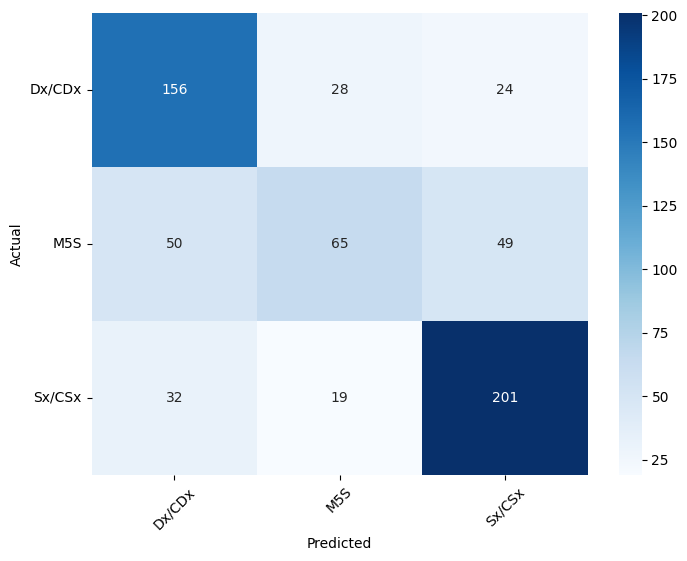

Classification Report:
              precision    recall  f1-score   support

      Dx/CDx       0.66      0.75      0.70       208
         M5S       0.58      0.40      0.47       164
      Sx/CSx       0.73      0.80      0.76       252

    accuracy                           0.68       624
   macro avg       0.66      0.65      0.64       624
weighted avg       0.67      0.68      0.67       624



In [24]:
# Calculate the confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Rename the squares with class names
tick_marks = [0.5, 1.5, 2.5]  # Adjust based on the number of classes
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names, rotation=0)

plt.show()

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_lgb))


In [25]:
import shap
from sklearn.inspection import PartialDependenceDisplay

In [26]:
cls = grid_search_lgb.best_estimator_

In [27]:
explainer_tree = shap.TreeExplainer(cls)
shap_values_tree = explainer_tree.shap_values(X_test)

In [28]:
def get_shaps(classifier, dataset):
    print(dataset.shape)
    explainer = shap.Explainer(classifier, dataset)
    shap_values = explainer(dataset,check_additivity=False)

    explainer_tree = shap.TreeExplainer(classifier)
    shap_values_tree = explainer_tree.shap_values(dataset)
    return shap_values,shap_values_tree

In [29]:
def plot_beeswarn(df,shap_values,filename,class_index=1):
    shap.summary_plot(shap_values[class_index], df,show=False,max_display=10,color='red',color_bar=True,class_names=True)
    fig = plt.gcf() # gcf means "get current figure"
    ax = plt.gca() #gca means "get current axes"

    fig.axes[1].yaxis.get_label().set_fontsize(22)
    # fig.axes[1].set_fontsize(24)
    plt.xlabel('SHAP value',fontsize=20)
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=15)
    plt.tight_layout()
    plt.savefig('{}.png'.format(filename))

In [30]:
explainer = shap.Explainer(cls, X_test)
shap_values = explainer(X_test,check_additivity=False)

 98%|===================| 1827/1872 [00:38<00:00]        

In [31]:
shap_values, shap_values_tree = get_shaps(cls, X_test)

(624, 35)


100%|===================| 1866/1872 [00:42<00:00]        

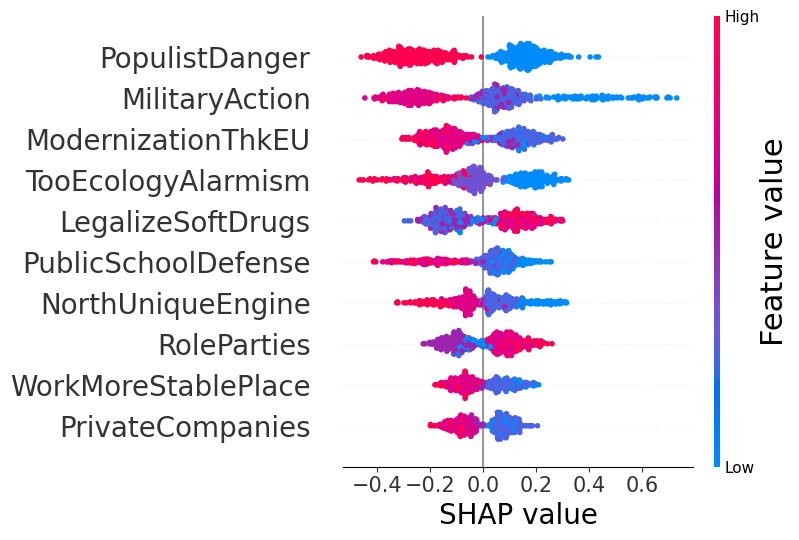

In [32]:
plot_beeswarn(X_test,shap_values_tree,'total',1)

In [33]:
X_test.columns

Index(['Age', 'ItaVSEu', 'RoleParties', 'TechnicalGovernment', 'OldValues',
       'UtilitySyndicate', 'TooFocusEqualityVMmerit',
       'BetterEqualityVSingle_Merit', 'TooCrime', 'MoralValidityChurc',
       'TooPermissiveGay', 'LegalizeSoftDrugs', 'ChurchNoInfluenceState',
       'LivingWill', 'ImmigrantsStealJobs', 'ImmigrantsAsResource',
       'ImmigrantsBringCrime', 'ImmigrantsRighToVote',
       'ImmigrantsNotRespectRules', 'ModernizationThkEU',
       'DangerIslamicReligion', 'TooSoftIslam', 'TooEcologyAlarmism',
       'PublicSchoolDefense', 'ProblematicGeneticExp', 'NorthUniqueEngine',
       'LikeEuThkNorth', 'MilitaryAction', 'WorkMoreStablePlace',
       'IndividualInterests', 'PrivateCompanies', 'MoreAntisocial',
       'PositiveImmigration', 'NationVSEu', 'PopulistDanger'],
      dtype='object')

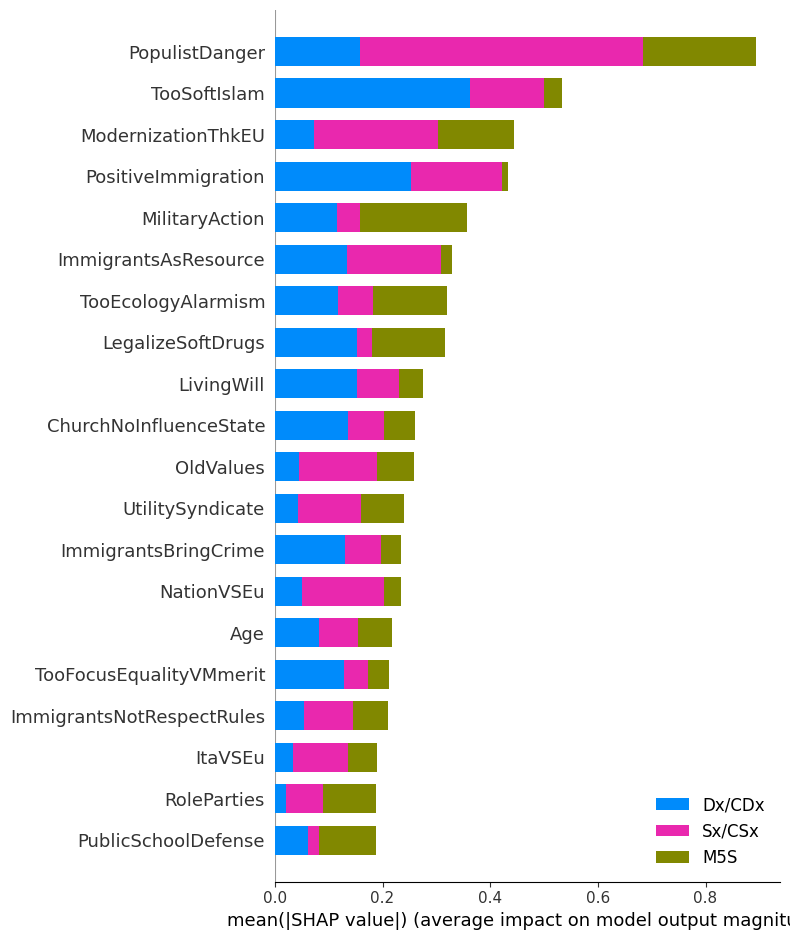

In [34]:
shap.summary_plot(shap_values_tree, X_test.values, plot_type="bar", class_names= class_names , feature_names = X_test.columns)

In [ ]:
shap.summary_plot(shap_values_tree[0], X_test.values, feature_names = X_test.columns ,max_display=10, show=False)
plt.title("Dx/CDx")
plt.show()

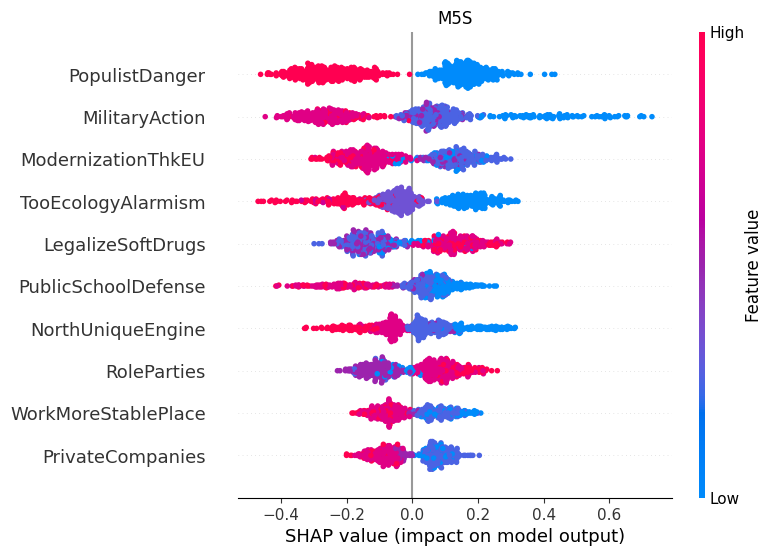

In [39]:
shap.summary_plot(shap_values_tree[1], X_test.values, feature_names = X_test.columns ,max_display=10 ,show=False)
plt.title("M5S")
plt.show()

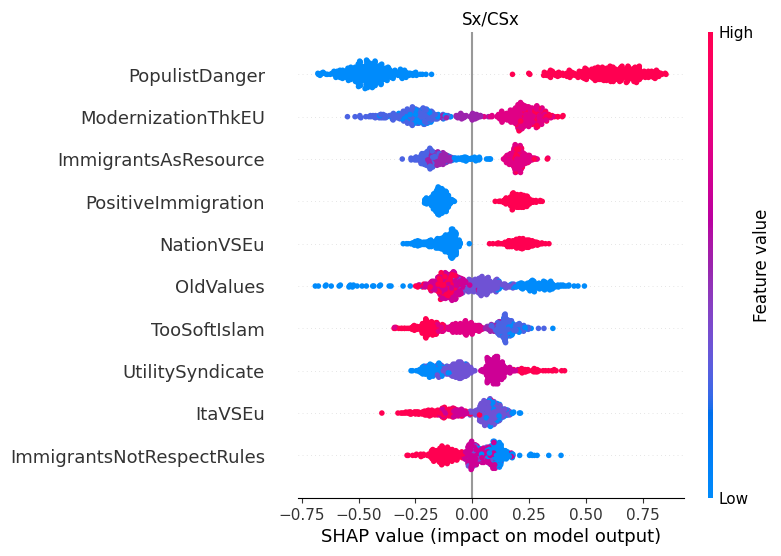

In [37]:
shap.summary_plot(shap_values_tree[2], X_test.values, feature_names = X_test.columns, show=False ,max_display=10)
plt.title("Sx/CSx")
plt.show()